# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info

id=[]
name=[]
lat=[]
lng=[]
temp_max=[]
humidity=[]
cloudiness=[]
wind_Speed=[]
country=[]
date=[]

#set a line counter
line_counter=1


# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval")
print("--------------------------")
for city in cities:
    #get the response
    response = requests.get(query_url + city).json()
    
    #exception handling  
    try:  
        #store required data into repective variables
        id.append(response['sys']['id'])
        name.append(response['name'])
        print(f"Processing Record {line_counter} - City {city}")
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_Speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        line_counter+=1
        
    except KeyError:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")       


Beginning Data Retrieval
--------------------------
Processing Record 1 - City ushuaia
Processing Record 2 - City bredasdorp
Processing Record 3 - City redmond
Processing Record 4 - City minusinsk
Processing Record 5 - City busselton
City not found. Skipping...
Processing Record 6 - City umm bab
Processing Record 7 - City norfolk
City not found. Skipping...
City not found. Skipping...
Processing Record 8 - City klaksvik
Processing Record 9 - City thompson
Processing Record 10 - City souillac
Processing Record 11 - City carnarvon
City not found. Skipping...
Processing Record 12 - City barrow
City not found. Skipping...
City not found. Skipping...
Processing Record 13 - City havre-saint-pierre
Processing Record 14 - City saint george
City not found. Skipping...
City not found. Skipping...
Processing Record 15 - City hermanus
Processing Record 16 - City cap-aux-meules
Processing Record 17 - City hasaki
Processing Record 18 - City alyangula
City not found. Skipping...
City not found. Skipp

City not found. Skipping...
City not found. Skipping...
Processing Record 137 - City yellowknife
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 138 - City mareeba
City not found. Skipping...
Processing Record 139 - City salta
City not found. Skipping...
Processing Record 140 - City tuatapere
Processing Record 141 - City saint-joseph
Processing Record 142 - City gorgan
Processing Record 143 - City bitam
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 144 - City coihaique
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 145 - City safford
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Reco

City not found. Skipping...
Processing Record 243 - City henties bay
Processing Record 244 - City izmir
Processing Record 245 - City kavaratti
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 246 - City ballina
City not found. Skipping...
Processing Record 247 - City urumqi
City not found. Skipping...
Processing Record 248 - City seoul
City not found. Skipping...
City not found. Skipping...
Processing Record 249 - City nelson bay
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 250 - City katherine
City not found. Skipping...
City not found. Skipping...
Processing Record 251 - City bathsheba
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 252 - City ribeira brava
Processing Record 253 - City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a data frame from City, Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date

weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_Speed,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

#convert date and time stamp to readable format
weather_data['Date']= pd.to_datetime(weather_data['Date'], unit='s')

#convert Max temp from celsius to fahrenheit
weather_data['Max temp']= ((weather_data['Max temp']*9/5)+32)

# Save Data to csv
weather_data.to_csv("../output_data/cities.csv", index = False)

weather_data.head()


,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,28.400,92,70,2.60,AR,2020-07-16 11:27:46
1,Bredasdorp,-34.53,20.04,64.400,48,0,2.60,ZA,2020-07-16 11:27:46
2,Redmond,47.67,-122.12,62.006,89,10,0.31,US,2020-07-16 11:23:29
3,Minusinsk,53.71,91.69,71.600,40,79,1.00,RU,2020-07-16 11:27:46
4,Busselton,-33.65,115.33,55.994,75,100,3.95,AU,2020-07-16 11:27:46


In [5]:
weather_data.count()

City          285
Lat           285
Lng           285
Max temp      285
Humidity      285
Cloudiness    285
Wind Speed    285
Country       285
Date          285
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#Inspect the data and remove the cities where the humidity > 100
weather_data_humid= weather_data.loc[weather_data["Humidity"] > 100, :]

if len(weather_data_humid)==0:
    clean_weather_data=weather_data
else:
    clean_weather_data=weather_data.loc[weather_data["Humidity"] <= 100, :]


# Export the City_Data into a csv
clean_weather_data.to_csv("../output_data/cities.csv", index = False)

clean_weather_data.count()

City          285
Lat           285
Lng           285
Max temp      285
Humidity      285
Cloudiness    285
Wind Speed    285
Country       285
Date          285
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [45]:
# defining a function to create scatter plot
def S_plot(x_value,y_value,fignum,x_label,y_label,title):
    plt.scatter(x_value,y_value, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
    plt.grid(b=None, which='major', axis='both')
    #Store todays date
    today = pd.to_datetime("today").strftime("%m/%d/%Y")
    #Labels and title
    plt.title(f"{title}({today}) ")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    #save figure 
    plt.savefig(f"../output_data/fig{fignum}.png")

    plt.show()
    # Resize plot to display labels
    plt.tight_layout()
    

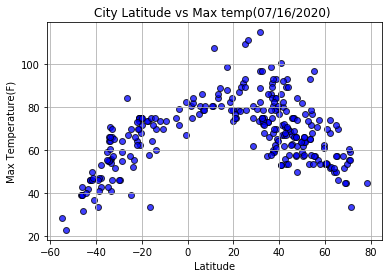

<Figure size 432x288 with 0 Axes>

In [46]:
# Create a Scatter Plot for Latitude vs Max temp
#define variable
x_temp = clean_weather_data['Lat']
y_temp = clean_weather_data['Max temp']
fignum=1
title="City Latitude vs Max temp"
x_label='Latitude'
y_label='Max Temperature(F)'

# call function S_plot
S_plot(x_temp,y_temp,fignum,x_label,y_label,title )



## Latitude vs. Humidity Plot

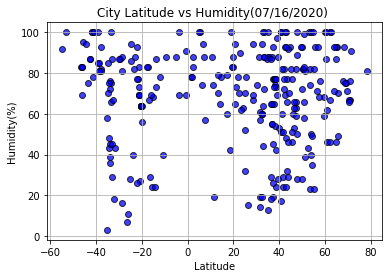

<Figure size 432x288 with 0 Axes>

In [47]:
# Create a Scatter Plot for Latitude vs Humidity

x_humid = clean_weather_data['Lat']
y_humid = clean_weather_data['Humidity']
fignum=2
title="City Latitude vs Humidity"
x_label='Latitude'
y_label='Humidity(%)'

# call function S_plot
S_plot(x_humid,y_humid,fignum,x_label,y_label,title )



## Latitude vs. Cloudiness Plot

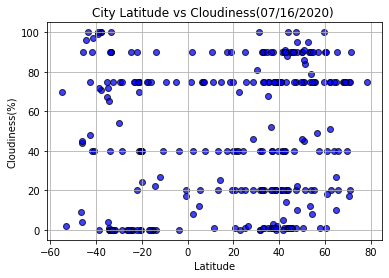

<Figure size 432x288 with 0 Axes>

In [48]:
# Create a Scatter Plot for Latitude vs Cloudiness

x_cloud = clean_weather_data['Lat']
y_cloud = clean_weather_data['Cloudiness']
fignum=3
title="City Latitude vs Cloudiness"
x_label='Latitude'
y_label='Cloudiness(%)'

# call function S_plot
S_plot(x_cloud,y_cloud,fignum,x_label,y_label,title )



## Latitude vs. Wind Speed Plot

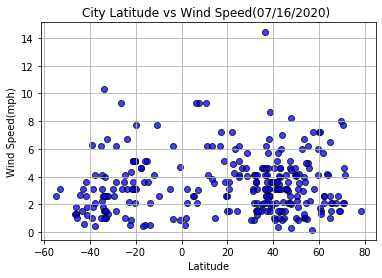

<Figure size 432x288 with 0 Axes>

In [49]:
# Create a Scatter Plot for Latitude vs Wind Speed

x_wind = clean_weather_data['Lat']
y_wind = clean_weather_data['Wind Speed']
fignum=4
title="City Latitude vs Wind Speed"
x_label='Latitude'
y_label='Wind Speed(mph)'

# call function S_plot
S_plot(x_wind,y_wind,fignum,x_label,y_label,title )



## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

In [13]:
# Create Northern and Southern Hemisphere DataFrames
weather_data_north = weather_data.loc[weather_data["Lat"] >=0, :]
weather_data_south = weather_data.loc[weather_data["Lat"] <0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [50]:
#Define a function to create Linear Regression plots

def L_regress(x_value, y_value, x_lbl, y_lbl,title,linepos,fignum):
    
    # Perform a linear regression
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)

    # Get regression values
    regress_value = x_value * slope + intercept
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    
    # Create Plot
    plt.scatter(x_value,y_value, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
    plt.plot(x_value,regress_value,"r-")
    plt.grid(b=None, which='major', axis='both')
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    #Label plot and annotate the line equation
    plt.xlabel(x_lbl)
    plt.ylabel(y_lbl)
    plt.title(title)
    plt.annotate(line_eq,linepos,fontsize=15,color="red")

    #save figure 
    plt.savefig(f"../output_data/fig{fignum}.png")

    # Show plot
    plt.show()

    


    

The r-squared is: 0.3814998624867338


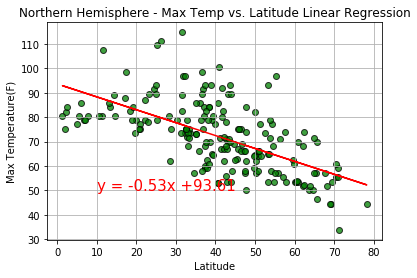

In [51]:
#define parameters for the function call
x_temp_n= weather_data_north['Lat']
y_temp_n = weather_data_north['Max temp']
x_lbl= 'Latitude'
y_lbl= 'Max Temperature(F)'
title= "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
linepos=(10,50)
fignum=5

#Calling Linear regress function
L_regress(x_temp_n, y_temp_n,x_lbl,y_lbl,title,linepos,fignum)



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5850606258333914


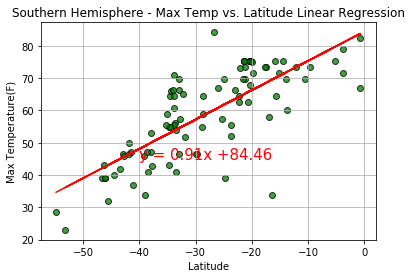

In [52]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
#define parameters for the function call
x_temp_s= weather_data_south['Lat']
y_temp_s = weather_data_south['Max temp']
x_lbl= 'Latitude'
y_lbl= 'Max Temperature(F)'
title= "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
linepos=(-40,45)
fignum=6

#Calling Linear regress function
L_regress(x_temp_s, y_temp_s,x_lbl,y_lbl,title,linepos,fignum)



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 5.444434868196006e-06


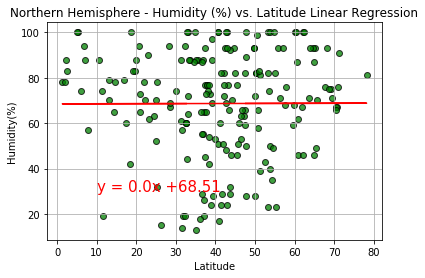

In [53]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression define parameters
x_humid_n= weather_data_north['Lat']
y_humid_n = weather_data_north['Humidity']
x_lbl= 'Latitude'
y_lbl= 'Humidity(%)'
title= "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
linepos=(10,30)
fignum=7

#Calling Linear regress function
L_regress(x_humid_n, y_humid_n,x_lbl,y_lbl,title,linepos,fignum)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03416697191043215


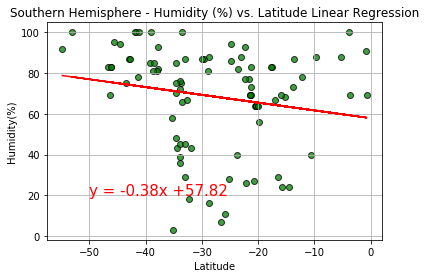

In [54]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression- define parameters
x_humid_s= weather_data_south['Lat']
y_humid_s = weather_data_south['Humidity']
x_lbl= 'Latitude'
y_lbl= 'Humidity(%)'
title= "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
linepos=(-50,20)
fignum=8

#Calling Linear regress function
L_regress(x_humid_s, y_humid_s,x_lbl,y_lbl,title,linepos,fignum)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.016386136233452798


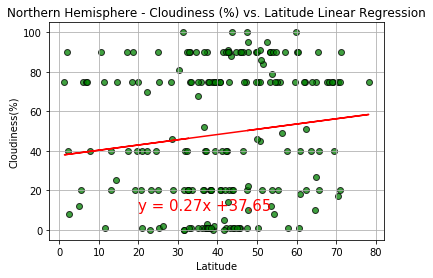

In [55]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression - define parameters
x_cloud_n= weather_data_north['Lat']
y_cloud_n = weather_data_north['Cloudiness']
x_lbl= 'Latitude'
y_lbl= 'Cloudiness(%)'
title= "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
linepos=(20,10)
fignum=9

#Calling Linear regress function
L_regress(x_cloud_n, y_cloud_n,x_lbl,y_lbl,title,linepos,fignum)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03792704827268206


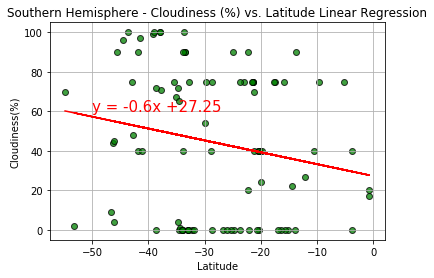

In [56]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression-define paramters
x_cloud_s= weather_data_south['Lat']
y_cloud_s = weather_data_south['Cloudiness']
x_lbl= 'Latitude'
y_lbl= 'Cloudiness(%)'
title= "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
linepos=(-50,60)
fignum=10

#Calling Linear regress function
L_regress(x_cloud_s, y_cloud_s,x_lbl,y_lbl,title,linepos,fignum)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009100987465091647


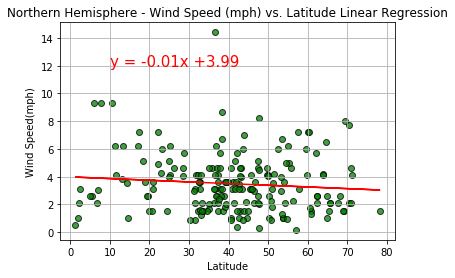

In [57]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression- define parameters
x_wind_n= weather_data_north['Lat']
y_wind_n = weather_data_north['Wind Speed']
x_lbl= 'Latitude'
y_lbl= 'Wind Speed(mph)'
title= "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
linepos=(10,12)
fignum=11

#Calling Linear regress function
L_regress(x_wind_n, y_wind_n,x_lbl,y_lbl,title,linepos,fignum)



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05931754794293013


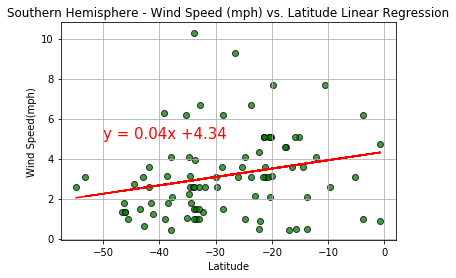

In [58]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression- define parameters
x_wind_s= weather_data_south['Lat']
y_wind_s = weather_data_south['Wind Speed']
x_lbl= 'Latitude'
y_lbl= 'Wind Speed(mph)'
title= "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
linepos=(-50,5)
fignum=12

#Calling Linear regress function
L_regress(x_wind_s, y_wind_s,x_lbl,y_lbl,title,linepos,fignum)

